### Objectives

First, create a graph representation of the information we have. 
This would be information about the elements, and the nodes. 
Using this, we will feed it into our SVM, or a Random Forest, and see from there onwards

In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from Generate_Excel import *
from MitoCode_Functions import open_file_dialog

In [3]:
import pandas as pd
import igraph as ig

def Mitograph_Graph(FileName):
    # Read information from the gnet file, and create a graph object
    # generate a function that takes in the filename and gives out the graph
    G = pd.read_table(FileName + '.gnet', skiprows=1, sep='\t', names=['Source', 'Target', 'Length'])
    graph = ig.Graph.TupleList(G.itertuples(index=False), directed=False, edge_attrs=['Length'])
    layout = graph.layout_auto()  # Automatic layout calculation
    graph.vs['degree'] = graph.degree()
    # ig.plot(graph, layout=layout)
    Vol = pd.read_table(FileName + '.cc', skiprows=0, sep='\t')
    Vol.columns = ['node', 'cc', 'vol_cc']

    ids = [int(node['name']) for node in graph.vs]
    graph.vs['cc_vol'] = [Vol.loc[Vol['node'] == node, 'vol_cc'].values[0] for node in ids]
    graph.vs['cc'] = [Vol.loc[Vol['node'] == node, 'cc'].values[0] for node in ids]
    return graph, Vol

In [4]:
# n = pd.read_csv('/home/mitosim2/Desktop/czi_files/full_node_Table_.csv')
# df = pd.read_csv('/home/mitosim2/Desktop/czi_files/full_Table_.csv')
n = pd.read_csv('/Users/birat/Onedrive/Desktop/TCDD11S/full_Table_.csv')
df = n

In [5]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_555', 'cc_pixel_intensity_ratio', 
            'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

# add Percentage Length
# average edge length
# Max edge length 
# Min edge length 
# CV of the edge length 
# Average PK 

import warnings
from matplotlib import cm

def plot_cc(main_df, df_dir, title = ''):

    warnings.filterwarnings("ignore", category=UserWarning)
    # plt.clf()
    cc_df = main_df[['folder_name_x','cc_x', 'cc_length_(um)', 'cc_max_PK', 'cc_vol_from_img_(um3)', 'branches', 'nodes', 'edges','cc_pixel_intensity_405', 'cc_pixel_intensity_488', 'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds', 'diameter', 'cc_average_connectivity']].drop_duplicates()
    
    cc_df['nodes_per_length'] = cc_df['nodes'] / cc_df['cc_length_(um)']
    cc_df['edges_per_length'] = cc_df['edges'] / cc_df['cc_length_(um)']
    cc_df['avgdegreeperl'] = cc_df['cc_average_degree_excludeFreeEnds']/cc_df['cc_length_(um)']
    cc_df['avgpkperl'] = cc_df['cc_max_PK']/cc_df['cc_length_(um)']
    cc_df['average_edge_length'] = cc_df
    # cc_df = cc_df[cc_df['edges'] != 1]
    a = cc_df.groupby("folder_name_x")
    dataframelist = [group for _, group in a]


    fig, ax = plt.subplots(1, 7, figsize=(33.6, 4))
    
    fig.tight_layout(w_pad=2)
    colors = cm.tab20(np.linspace(0, 1, len(dataframelist)))
    i = -1
    for df_index, df in enumerate(dataframelist):
        edges = main_df[main_df['cc_x'] == df['cc_x'].values[0] and main_df['folder_name_x'] == df['folder_name_x'].values[0]]
        df['average_edge_length'] = edges['element_'].mean() 
        
        # ax.scatter(dat[:, 1], (datfunc),  color=colors[df_index])
        # print(len(df['cc_length_(um)']), len(df['cc_pixel_intensity_488']))
        # print(type(df['cc_length_(um)']), type(df['cc_pixel_intensity_488']))
        # # drop nan values from df 
        # # df = df.dropna()
        # print(len(df['cc_length_(um)']), len(df['cc_pixel_intensity_488']))
        ax[0].scatter(df['cc_length_(um)'] ,df['cc_pixel_intensity_ratio'],color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)
        ax[1].scatter(df['nodes'],df['cc_pixel_intensity_ratio'],  color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)
        ax[2].scatter(df['edges'],df['cc_pixel_intensity_ratio'],  color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)
        ax[3].scatter(df['nodes_per_length'],df['cc_pixel_intensity_ratio'],  color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)
        ax[4].scatter(df['edges_per_length'],df['cc_pixel_intensity_ratio'],  color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)
        ax[5].scatter(df['avgdegreeperl'], df['cc_pixel_intensity_ratio'],  color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)
        ax[6].scatter(df['avgpkperl'], df['cc_pixel_intensity_ratio'],  color=colors[df_index], label=df['folder_name_x'].values[0].split('hr', 1)[-1], s= 12)

    return cc_df


In [ ]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_555', 'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

In [ ]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_555', 
            'cc_pixel_intensity_ratio', 'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

ele_df = df[['line_id', 'folder_name_x', 'element_pixel_intensity_488', 'element_pixel_intensity_405', 'element_pixel_intensity_555', 
            'element_pixel_intensity_ratio', 'element_Volume_Voxel', 'element_length_(um)', 'element_average_width' ]].drop_duplicates(subset=['line_id', 'folder_name_x'])

In [ ]:
ele_df.drop(['line_id', 'folder_name_x', 'element_pixel_intensity_555'], axis = 1)

,element_pixel_intensity_488,element_pixel_intensity_405,element_pixel_intensity_ratio,element_Volume_Voxel,element_length_(um),element_average_width
0,400.375000,31.687500,0.079145,0.395035,1.563550,0.252653
4,245.700000,42.200000,0.171754,0.072792,0.421737,0.172600
9,897.437500,41.000000,0.045686,0.414276,2.014889,0.205607
13,884.785714,41.107143,0.046460,0.319226,1.307177,0.244210
20,709.788462,34.269231,0.048281,0.648523,2.133120,0.304025
...,...,...,...,...,...,...
259458,521.625000,13.250000,0.025401,0.047226,0.330596,0.142852
259462,499.416667,21.583333,0.043217,0.036582,0.208000,0.175873
259465,438.035714,39.107143,0.089278,0.228966,0.874160,0.261927
259472,327.625000,20.750000,0.063335,0.058393,0.312000,0.187158


In [ ]:
ele_corr = ele_df.drop(['line_id', 'folder_name_x', 'element_pixel_intensity_555'], axis = 1).corr()
ele_corr.to_csv('element_corr.csv')

In [ ]:
cc_corr = cc_df.drop(['cc_x', 'folder_name_x'], axis = 1).corr()
cc_corr.to_csv('cc_corr.csv')

In [ ]:
cc_df

,cc_x,folder_name_x,cc_pixel_intensity_488,cc_pixel_intensity_405,cc_pixel_intensity_555,cc_pixel_intensity_ratio,cc_average_degree_excludeFreeEnds,cc_max_PK,diameter,cc_vol_from_img_(um3),branches,nodes,edges
0,0,Tol1hr3_2_S2,400.375000,31.687500,381.375000,0.079145,0.000000,0,0.273622,0.09194,1,2,1
4,1,Tol1hr3_2_S2,245.700000,42.200000,251.800000,0.171754,0.000000,2,0.383322,0.04867,1,2,1
9,2,Tol1hr3_2_S2,868.068120,50.390327,729.465032,0.058049,2.071429,9,0.484119,45.07027,60,140,175
1126,3,Tol1hr3_2_S2,715.049684,42.017089,612.081013,0.058761,1.850467,8,0.497718,31.25283,48,107,123
1923,4,Tol1hr3_2_S2,262.500000,4.062500,139.500000,0.015476,0.000000,2,0.514636,0.06490,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259458,57,TCDD10nM4hr_5_4_S,521.625000,13.250000,172.125000,0.025401,0.000000,2,0.408182,0.04326,1,2,1
259462,58,TCDD10nM4hr_5_4_S,499.416667,21.583333,166.666667,0.043217,0.000000,2,0.481408,0.03786,1,2,1
259465,59,TCDD10nM4hr_5_4_S,438.035714,39.107143,137.357143,0.089278,0.000000,2,0.477941,0.15683,1,2,1
259472,60,TCDD10nM4hr_5_4_S,327.625000,20.750000,154.250000,0.063335,0.000000,2,0.420166,0.04326,1,2,1


In [ ]:
eledf = df[['line_id', 'cc_x', 'element_Volume_Voxel', 'element_pixel_intensity_405', 'element_length_(um)', 'element_pixel_intensity_488', 'element_pixel_intensity_555' 
            ,'element_pixel_intensity_ratio', 'element_average_width', 'folder_name_x']].drop_duplicates(subset=['line_id', 'folder_name_x'])

bigDf = n
# rename folder_name_x to folder_name in eledf
# eledf.rename(columns={'folder_name_x': 'folder_name'}, inplace=True)
bigDf = pd.merge(bigDf, eledf, how='left', left_on=['line_id', 'folder_name'], right_on=['line_id', 'folder_name_x'])

In [ ]:
bigDf

,Unnamed: 0,x,y,z,node,line_id,point_id,degree,cc,vol_cc,...,folder_name,cc_x,element_Volume_Voxel,element_pixel_intensity_405,element_length_(um),element_pixel_intensity_488,element_pixel_intensity_555,element_pixel_intensity_ratio,element_average_width,folder_name_x
0,0,17.680,14.144,9.5,0,421,4,1,1,0.04867,...,Tol1hr3_2_S2,1,0.072792,42.200000,0.421737,245.700000,251.800000,0.171754,0.172600,Tol1hr3_2_S2
1,1,17.992,13.936,9.5,1,421,0,1,1,0.04867,...,Tol1hr3_2_S2,1,0.072792,42.200000,0.421737,245.700000,251.800000,0.171754,0.172600,Tol1hr3_2_S2
2,2,14.352,10.296,9.5,2,420,3,1,4,0.06490,...,Tol1hr3_2_S2,4,0.055264,4.062500,0.312000,262.500000,139.500000,0.015476,0.177127,Tol1hr3_2_S2
3,3,14.352,9.984,9.5,3,420,0,1,4,0.06490,...,Tol1hr3_2_S2,4,0.055264,4.062500,0.312000,262.500000,139.500000,0.015476,0.177127,Tol1hr3_2_S2
4,4,7.384,9.984,9.5,4,399,13,1,3,31.25283,...,Tol1hr3_2_S2,3,0.984514,30.642857,2.816219,661.928571,414.428571,0.046293,0.349587,Tol1hr3_2_S2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70299,129,9.256,3.952,1.5,123,3,0,1,19,0.93018,...,TCDD10nM4hr_5_4_S,19,0.343969,46.666667,1.345169,530.583333,194.333333,0.087954,0.255707,TCDD10nM4hr_5_4_S
70300,130,0.312,3.848,1.5,124,2,0,1,54,0.35152,...,TCDD10nM4hr_5_4_S,54,0.405522,32.038462,1.590595,622.884615,295.480769,0.051436,0.254950,TCDD10nM4hr_5_4_S
70301,131,8.528,1.560,1.5,125,1,2,1,56,0.07571,...,TCDD10nM4hr_5_4_S,56,0.049245,23.750000,0.235862,293.833333,174.250000,0.080828,0.208787,TCDD10nM4hr_5_4_S
70302,132,8.632,1.352,1.5,126,1,0,1,56,0.07571,...,TCDD10nM4hr_5_4_S,56,0.049245,23.750000,0.235862,293.833333,174.250000,0.080828,0.208787,TCDD10nM4hr_5_4_S


In [ ]:
bigDf = bigDf[['line_id', 'folder_name_x', 'node', 'node_2', 'element_pixel_intensity_488', 'element_pixel_intensity_405', 'element_pixel_intensity_555', 'element_length_(um)', 'element_average_width']]

KeyError: "['node_2'] not in index"

In [ ]:
cc_df = df.drop_duplicates(subset=['cc_x', 'folder_name'])

KeyError: Index(['folder_name'], dtype='object')

In [ ]:
df.columns

Index(['cc_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405',
       'element_pixel_intensity_ratio', 'element_pixel_intensity_488',
       'element_pixel_intensity_405', 'element_length_(um)',
       'element_average_width', 'branches', 'nodes', 'edges', 'cc_max_PK',
       'cc_length_(um)'],
      dtype='object')

In [ ]:
df.drop(['folder_name_x', 'line_id'], axis=1, inplace=True)

/tmp/ipykernel_416380/698579016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['folder_name_x', 'line_id'], axis=1, inplace=True)


In [ ]:
df.drop('cc_pixel_intensity_488', axis=1, inplace=True)

/tmp/ipykernel_416380/3937549250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('cc_pixel_intensity_488', axis=1, inplace=True)


In [ ]:
df

,cc_pixel_intensity_405,branches,nodes,edges,cc_max_PK,cc_length_(um)
0,19.500000,1,2,1,2,0.87492
6,22.156250,1,2,1,2,0.93847
14,12.906250,1,2,1,2,0.97180
22,6.250000,1,2,1,2,0.23586
25,7.312500,1,2,1,2,0.31200
...,...,...,...,...,...,...
2091,31.500000,1,2,1,2,0.42324
2095,10.333333,1,2,1,2,0.20800
2098,30.000000,1,2,1,2,0.23586
2101,41.500000,1,2,1,2,0.20800


In [ ]:
graph = ig.Graph.TupleList(bigDf.itertuples(index=False), directed=False, edge_attrs=['line_id', 'element_pixel_intensity_ratio', 'element_pixel_intensity_405', 'element_length_(um)', 'element_pixel_intensity_488'])

# ids = [int(node['name']) for node in graph.vs]
# graph.vs['cc_vol'] = [df.loc[df['node'] == node, 'degree'].values[0] for node in ids]
# graph.vs['488'] = [df.loc[df['node'] == node, 'pixel_intensity_488'].values[0] for node in ids]
# graph.vs['405'] = [df.loc[df['node'] == node, 'pixel_intensity_405'].values[0] for node in ids]
# graph.vs['ratio'] = [df.loc[df['node'] == node, 'pixel_intensity_ratio'].values[0] for node in ids]
# graph.vs['structural'] = [df.loc[df['node'] == node, 'pixel_intensity_555'].values[0] for node in ids]

NameError: name 'bigDf' is not defined

In [ ]:
df.drop_duplicates(subset=['line_id', 'folder_name_x', 'cc_x'], inplace=True)

KeyError: Index(['line_id', 'folder_name_x'], dtype='object')

In [ ]:
corr = df.corr()

In [ ]:
n = pd.read_csv('/home/mitosim2/Desktop/czi_files/full_node_Table_.csv')
df = pd.read_csv('/home/mitosim2/Desktop/czi_files/full_Table_.csv')

In [ ]:
cc_df = df[['cc_x', 'folder_name_x', 'cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_pixel_intensity_ratio',
            'cc_pixel_intensity_555',  'cc_average_degree_excludeFreeEnds',
             'cc_max_PK', 'diameter', 'cc_vol_from_img_(um3)', 'branches'
            , 'nodes', 'edges']].drop_duplicates(subset = ['cc_x','folder_name_x'])

ele_df = df[['line_id', 'folder_name_x', 'element_pixel_intensity_488', 'element_pixel_intensity_405', 'element_pixel_intensity_555', 
            'element_pixel_intensity_ratio', 'element_Volume_Voxel', 'element_length_(um)', 'element_average_width' ]].drop_duplicates(subset=['line_id', 'folder_name_x'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# make cc_df only the first 1000 entries 
cc_df = cc_df[:1000]

In [ ]:
cc_df['cc_pixel_intensity_488'] = cc_df['cc_pixel_intensity_488'].astype(int)

/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/si

Text(0, 0.5, 'Predicted')

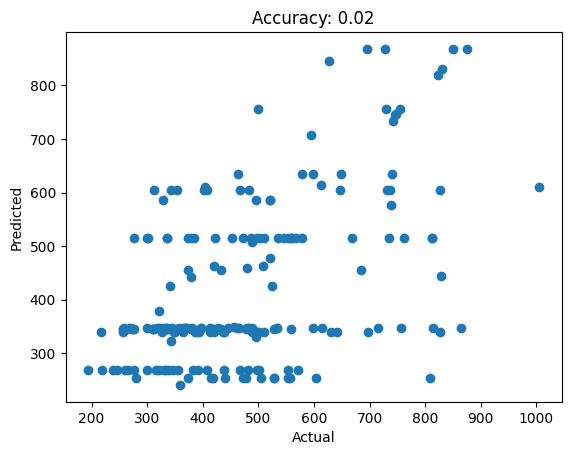

In [ ]:
X = cc_df.drop(['cc_pixel_intensity_488', 'cc_pixel_intensity_405', 'cc_x', 'folder_name_x'], axis=1)  # Adjust 'target_column' to your actual target column name
y = cc_df['cc_pixel_intensity_488']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

plt.plot(y_test, y_pred, 'o')
plt.title('Accuracy: {}'.format(accuracy))
plt.xlabel('Actual')
plt.ylabel('Predicted')


/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/si

Text(0, 0.5, 'Predicted')

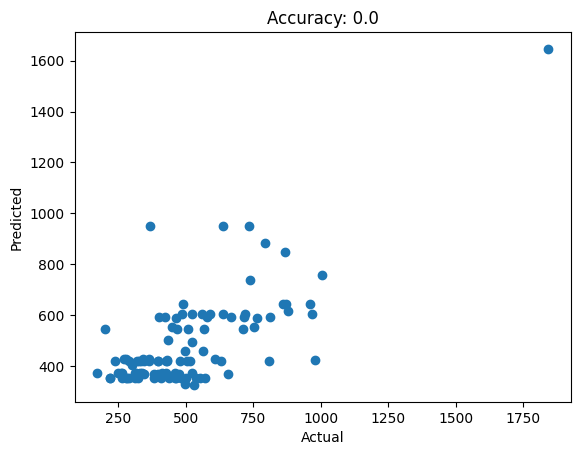

In [ ]:
xx

Text(0, 0.5, 'pred')

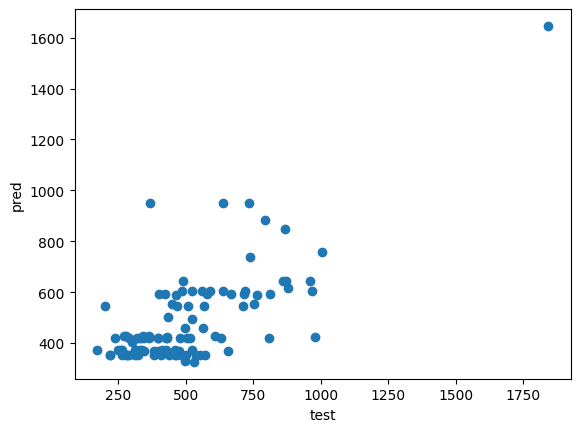

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('test')
plt.ylabel('pred')

/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/.local/lib/python3.10/si

Text(0, 0.5, 'Predicted')

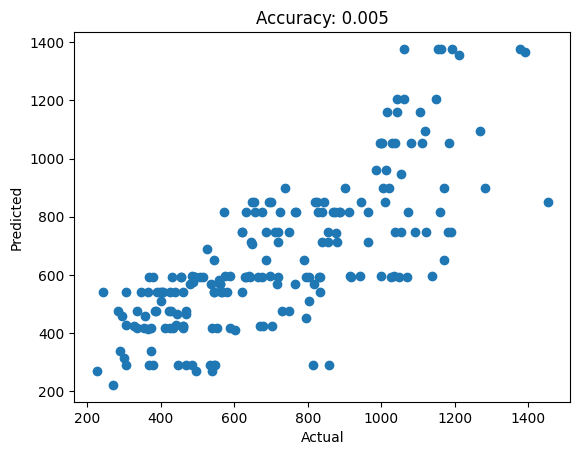

In [ ]:
ele_df = ele_df[:1000]
ele_df['element_pixel_intensity_488'] = ele_df['element_pixel_intensity_488'].astype(int)

X = ele_df.drop(['element_pixel_intensity_405', 'line_id', 'folder_name_x', 'element_pixel_intensity_488', 'element_pixel_intensity_ratio'], axis=1)  # Adjust 'target_column' to your actual target column name
y = ele_df['element_pixel_intensity_488']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

plt.plot(y_test, y_pred, 'o')
plt.title('Accuracy: {}'.format(accuracy))
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 1.0, 'Accuracy: 0.005')

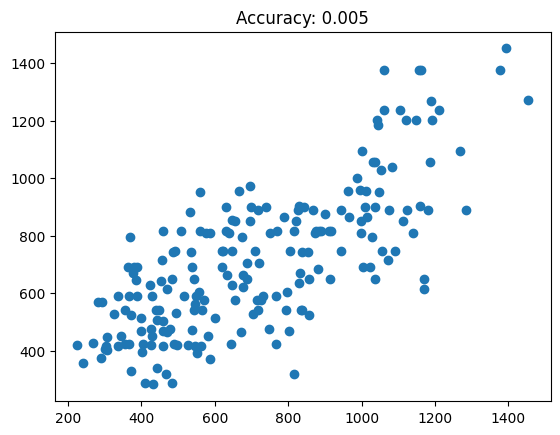

In [ ]:
# do the same for random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=0)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.plot(y_test, y_pred, 'o')
plt.title('Accuracy: {}'.format(accuracy))



In [3]:
def findRepeats(x):
    for i in range(len(x)):
        if x[i] == x[i+1]:
            if i < len(x)-2:
                return 1 + findRepeats(x[i+1:])
            
    return 0

findRepeats('abababab')

IndexError: string index out of range

In [5]:
# 2-b 
def giveKlist(X, k): 
    nlist = []
    indexes_to_add = len(X)//k 
    for i in range(1, indexes_to_add+1):
        nlist.append(X[i*k-1])
    return nlist

giveKlist([1, 2, 3, 4, 5], 2)

[2, 4]

In [11]:
#2-c 
def convertBase(val, k): 
    # get val in base 1: 
    base1 = val * 10 
    # convert base1 to base k
    for i in range(0, 10): 
        if base1 < i**k: 
            break
    return i
convertBase(1, 2)

4

In [13]:
#2-d 
import random 
def tossCoins(p, t): 
    # p is probability of heads 
    # t is number of tosses
    resultList = []
    for i in range(0, t): 
        if random.random() < p: 
            resultList.append('H')
        else: 
            resultList.append('T')
    return resultList
tossCoins(0.7, 10)

['H', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'H']

In [16]:
#2-e
def printArr(A, B): 
    len1 = len(A)
    len2 = len(B)
    longer_len = max(len1, len2)
    smaller_len = min(len1, len2)
    npList = []
    for i in range(0, smaller_len): 
        npList.append(A[i])
        npList.append(B[i])
    if len1 > len2: 
        for i in range(smaller_len, longer_len): 
            npList.append(A[i])
    else:
        for i in range(smaller_len, longer_len): 
            npList.append(B[i])

    return npList        

[1, 6, 2, 3, 4, 5]

In [18]:
#2-f
def printMany(x, k): 
    # turn int into string  
    x = str(x)
    return k * x


In [20]:
#2-g
def reverseString(x): 
    return x[::-1]


In [68]:
#2-h

def reverseSkipNum(x):
    # find index position of the numbers
    indexes = []
    for i in range(len(x)): 
        if x[i].isdigit(): 
            indexes.append(i)
    print(indexes)
    newstr = ''
    # remove the numbers from the string
    for i in range(len(x)): 
        if i not in indexes: 
            newstr += x[i]
    # reverse newstr: 
    newstr = newstr[::-1]
    print(newstr)
    neweststr = ''
    k = 0
    for i in range(len(x)): 
        if i in indexes:
            neweststr += x[i]
        else: 
            neweststr += newstr[k]
            k = k + 1
    return neweststr
reverseSkipNum('a1b2c3d4e5f6')

[1, 3, 5, 7, 9, 11]
fedcba


'f1e2d3c4b5a6'

In [55]:
def harmonicSum(n):
    sum = 0
    for i in range(1, n+1): 
        sum += 1/i
    return sum

def inverseAdd(x, y): 
    return harmonicSum(x)/harmonicSum(y)

'f'

In [27]:
a = '1a3rf35'
# split string at int
intList = []
for i in a: 
    if type(i) == int: 
        intList.append(i)

TypeError: must be str or None, not bool